<a href="https://colab.research.google.com/github/roysoni24/Airbnb-analysis/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions
 of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 

* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

Earlier we didn't know about the "Github " And nor about the repositories , So firstly, we means all the group members created a account in github and then created a repositories  so that we can check how to commit and upload the progress of the analysis project like versoining module from time to time in our repositories. After The first commit we all have started analysing the raw data provided to us . The data is in the  form of .csv files, so first we go through the data like all the coloumns header and which type of values are inside that columns. so that's how we started our analysis journey...

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from skimage.io import imread

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load .csv file
df_airb = pd.read_csv('/content/drive/MyDrive/Alma Better/Capstone Projects/Capstone Project1 AirBnb Analysis/Copy of Airbnb NYC 2019.csv')

In [4]:
df_airb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
#Shape of dataframe
df_airb.shape

(48895, 16)

In [6]:
#Checking datatypes and other information of columns
df_airb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
#Extracting all columns in the dataframe
df_airb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
#Indentifying Columns that have null values
df_airb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
#replacing Null values in the "reviews_per_month" column with 0 
df_airb['reviews_per_month'].fillna(0,inplace=True)

In [10]:
#dropping columns that's not significant
df_airb.drop(["last_review","latitude","longitude"],inplace=True,axis=1)

In [11]:
df_airb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [12]:
#replacing Null values in the "name" column with "Anonymous"
df_airb['name'].fillna("Anonymous",inplace=True)

In [13]:
#replacing Null values in the "host_name" column with "Anonymous Host Name" 
df_airb['host_name'].fillna("Anonymous Host Name",inplace=True)

In [14]:
#Examining Changes 
df_airb.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

##1. What can we learn about different hosts and areas?

firstly, we extract the value_listing_counts of different hosts grouped by their neighbourhood

In [15]:
#grouped host_name and neighbourhoos_group on their host_listing_counts and then  sort the values in descending order
hosts_in_areas = df_airb.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_in_areas.sort_values(by='calculated_host_listings_count', ascending=False)

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1838,Blueground,Manhattan,232
1837,Blueground,Brooklyn,232
7279,Kara,Manhattan,121
7483,Kazuya,Manhattan,103
...,...,...,...
5821,Iman,Brooklyn,1
5822,Imani,Brooklyn,1
5824,Imelda,Queens,1
5825,Imma,Brooklyn,1


In [16]:
#hosts_in_areas.value_counts
top_10_hosts=hosts_in_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(10)

In [17]:
top_10_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1838,Blueground,Manhattan,232
1837,Blueground,Brooklyn,232
7279,Kara,Manhattan,121
7483,Kazuya,Manhattan,103
7482,Kazuya,Brooklyn,103
7484,Kazuya,Queens,103
13220,Sonder,Manhattan,96
6544,Jeremy & Laura,Manhattan,96
2905,Corporate Housing,Manhattan,91


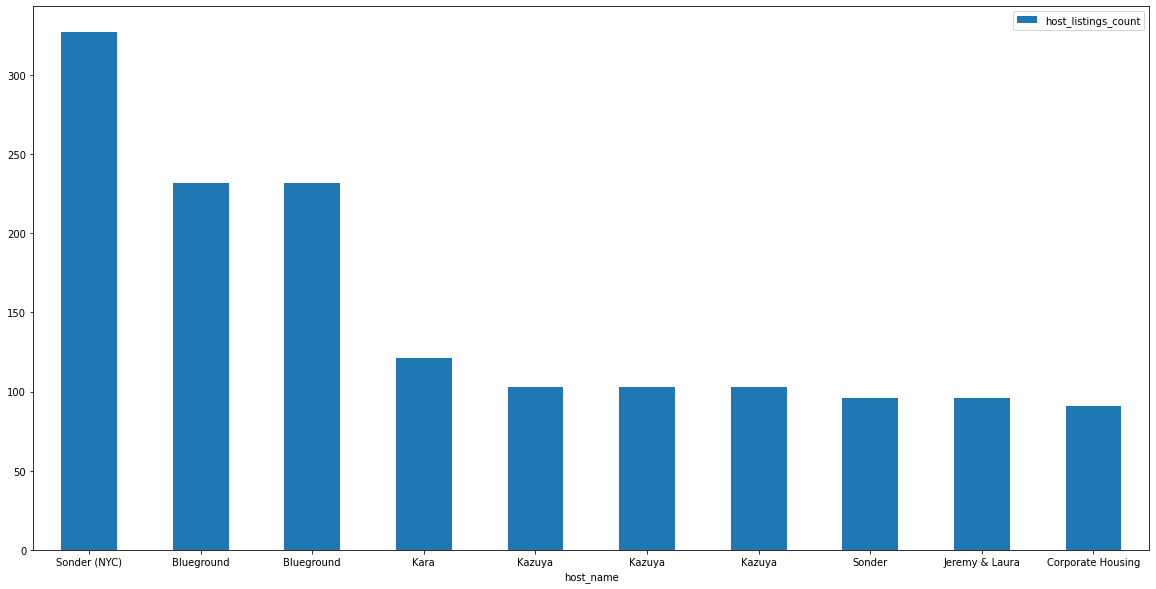

In [18]:
#top_10 hosts and their value listing counts plotted on bar chart
top_10_hosts_for_bar_plot = pd.DataFrame({'host_name':top_10_hosts["host_name"], 'host_listings_count':top_10_hosts["calculated_host_listings_count"]})
ax = top_10_hosts_for_bar_plot.plot.bar(x='host_name', y='host_listings_count', rot=0,figsize=(20,10))

2. What can we learn from predictions? (ex: locations, prices, reviews, etc)


According the condition given, we will made our predictions such as firstly, we group different locations and their reviews .Then secondly, we group different locations and their prices and lastly, we group different prices and the review .

In [19]:
#In this we grouped different neighbour_hood group and the number of reviews
loaction_review_data = df_airb.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
loaction_review_data

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


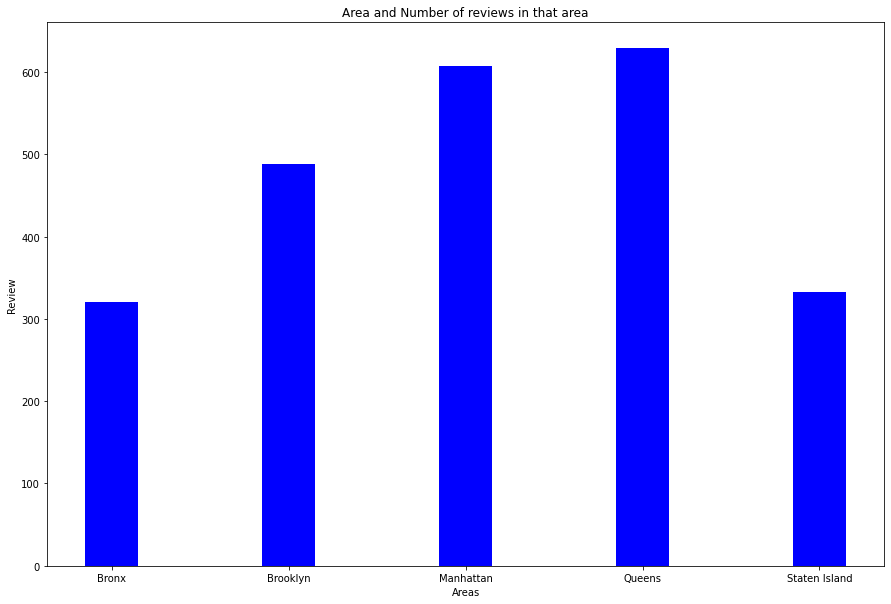

In [20]:
#Plot Bar chart Of Areas(neighbourhood_group) VS Reviews in that areas
Areas = loaction_review_data['neighbourhood_group']
Reviews = loaction_review_data['number_of_reviews']

chart = plt.figure(figsize = (15,10))
 
# drawing the bar plot
plt.bar(Areas, Reviews, color ='blue',
        width = 0.3)
 
plt.xlabel("Areas")
plt.ylabel("Review")
plt.title("Area and Number of reviews in that area")
plt.show()

Analysing this chart we conclude that Brooklyn,Manhattan,Queens has highest number of reviews as compared to Bronx and staten Island As they have average reviews

In [21]:
##In this we grouped different neighbour_hood group and Prices in different areas
loaction_price_data = df_airb.groupby(['neighbourhood_group'])['price'].max().reset_index()
loaction_price_data

,neighbourhood_group,price
0,Bronx,2500
1,Brooklyn,10000
2,Manhattan,10000
3,Queens,10000
4,Staten Island,5000


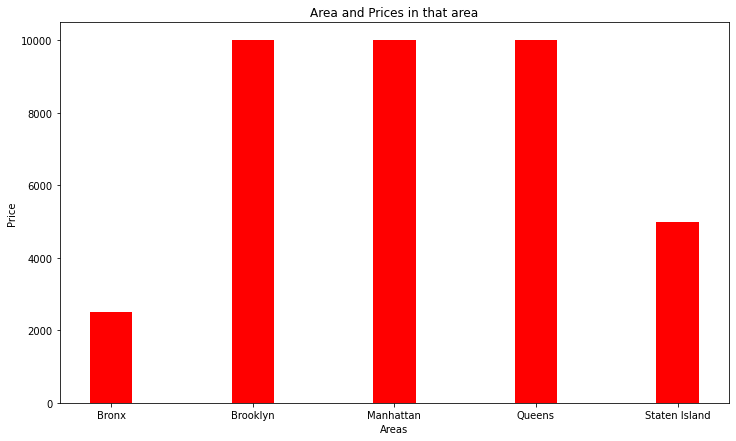

In [22]:
#Plot Bar chart Of Areas(neighbourhood_group) VS Price in that area
Areas = loaction_price_data['neighbourhood_group']
Price = loaction_price_data['price']

chart = plt.figure(figsize = (12,7))
 
# drawing the bar plot
plt.bar(Areas, Price, color ='red',
        width = 0.3)
 
plt.xlabel("Areas")
plt.ylabel("Price")
plt.title("Area and Prices in that area")
plt.show()

Analysing the above chart we concluded that Brooklyn,Manhattan,queens have Higher prices as compared to Bronx And Staten Island

In [23]:
#In this we grouped different Prices and Reviews on the different prices
review_price_data = df_airb.groupby(['price'])['number_of_reviews'].max().reset_index()
review_price_data.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


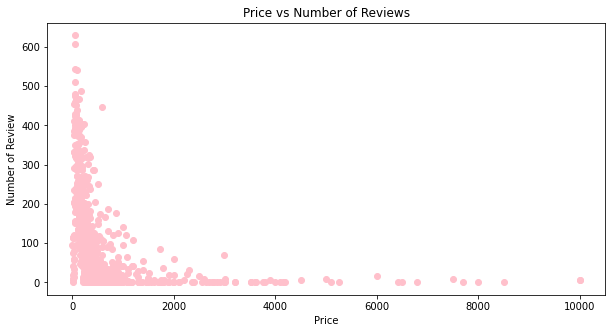

In [24]:
#Plot chart Of Price VS Reviews on the prices
price = review_price_data['price']
review = review_price_data['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.scatter(price, review,color='pink')
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

Analysing the above chart we concluded that lower the price ,higher the reviews

Finally , We concluded that Brooklyn,Manhattan,Queens have higher prices and reviews also and the Bronx and staten island have less prices and reviews also as compared to other if we compare all prices and reviews then we find that lower prices has highest reviews 

#3. Which hosts are the busiest and why?

In [25]:
#In this we grouped host_name,room_type based on reviews
busiest_hosts = df_airb.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10297,Dona,47621202,Private room,629
17726,Jj,4734398,Private room,607
25584,Maya,37312959,Private room,543
6253,Carol,2369681,Private room,540
8965,Danielle,26432133,Private room,510
3968,Asa,12949460,Entire home/apt,488
37766,Wanda,792159,Private room,480
22517,Linda,2680820,Private room,474
8643,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


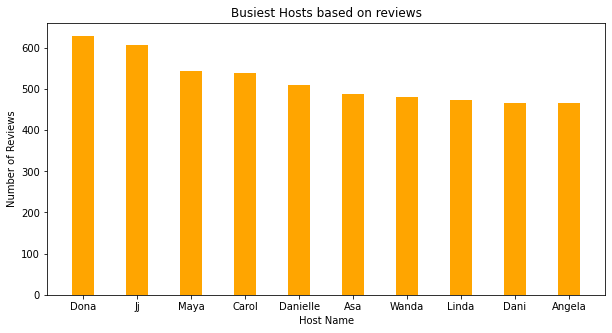

In [26]:
# creating the bar plot on host_name Vs Reviews
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 

plt.bar(name, reviews, color ='orange',
        width = 0.4)
 
plt.xlabel("Host Name")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts based on reviews")
plt.show()

while, Analysing the above chart we conclude that Dona,Jj, Maya are the busiest hosts followed by Carol,Danielle,Asa And other hosts. The Host With maximum reviews are the busiest host .

##4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [27]:
#Grouped data by Neighbourhood_type and minimum_nights spends on that area in different room types.
Busiest_areas = df_airb.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
Busiest_areas = Busiest_areas.sort_values(by='minimum_nights', ascending=False)
Busiest_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


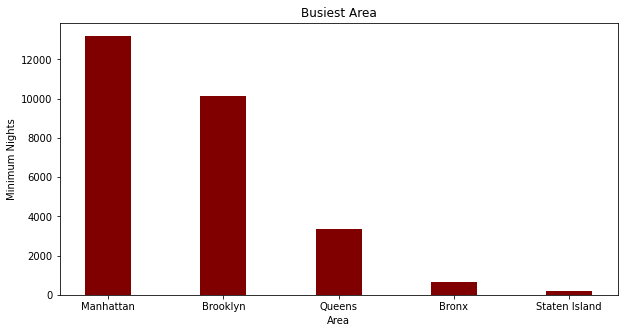

In [28]:
# creating the bar plot Neighbourhood_group(area) VS Minimum_nights
room_type = Busiest_areas['neighbourhood_group']
stayed = Busiest_areas['minimum_nights']

fig = plt.figure(figsize = (10, 5))
 
plt.bar(room_type, stayed, color ='maroon',
        width = 0.4)
 
plt.xlabel("Area")
plt.ylabel("Minimum Nights")
plt.title("Busiest Area")
plt.show()

From the above chart we can conclude that, Manhattan was the busiest areas among all followed by Brooklyn,Queens,Bronx,Staten Island respectively.

##We also analysed about the different room types and the reviews given to that so that we can analyse which is the most preferrable room type.

In [29]:
#Grouped Data By Room type and minimum_nights 
minimum_nights_stayed_room = df_airb.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
minimum_nights_stayed_room = minimum_nights_stayed_room.sort_values(by='minimum_nights', ascending=False)
minimum_nights_stayed_room

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


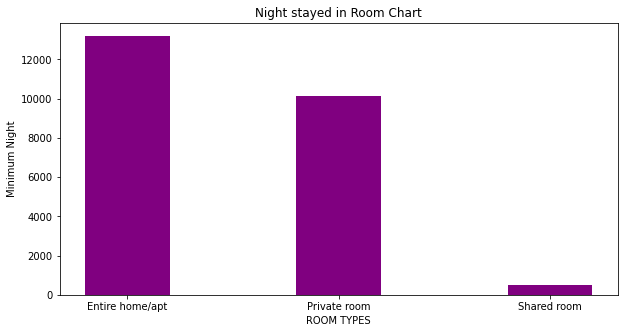

In [30]:
#Bar chart for room_type VS Number_of_reviews
room_type = minimum_nights_stayed_room['room_type']
minimum_nights = minimum_nights_stayed_room['minimum_nights']

fig = plt.figure(figsize = (10, 5))
 
plt.bar(room_type, minimum_nights, color ='purple',
        width = 0.4)
 
plt.xlabel("ROOM TYPES")
plt.ylabel("Minimum Night")
plt.title("Night stayed in Room Chart")
plt.show()

While Analysing the above chart we concluded that Entire home/apt room is most preferrable followed by Private and shared room is least preferred.

##Conclusion:
1. The people who prefer to stay in Entire home or Apartment they are going to stay bit longer in that particular Neighbourhood only.
1. 
2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.
3. Most people prefer to pay less price.
4. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.
5. If people are not staying more then one night means they are travellers.